<a href="https://colab.research.google.com/github/sairam76/NLP/blob/main/Assignment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data fromkeras.datasets and perform following computational analysis:- [CO3]

(a) Preprocessing of the Data

(b) Divide data into training and testing data set

(c) Build the Gated Recurrent Units (GRU) Model

(d) Training the GRU Model

(e) Text Generation Using the Trained Model

 (f)  Evaluate Model’s accuracy

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import imdb

# (a) Preprocessing of the Data
vocab_size = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# (c) Build the Gated Recurrent Units (GRU) Model
model = Sequential()
model.add(Embedding(vocab_size, 128))
model.add(GRU(128, return_sequences=False))  # Can use return_sequences=True for text generation
model.add(Dense(1, activation='sigmoid'))

# (d) Training the GRU Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(x_train, y_train, epochs=5, batch_size=128,
                    validation_split=0.2, callbacks=[early_stopping])

# (f) Evaluate Model’s accuracy
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

# (e) Text Generation Using the Trained Model - Example (simple, placeholder)
# Not a fully trained language model but a simple way to generate sequences
def generate_text(seed_text, next_words=10):
    for _ in range(next_words):
        # Convert seed text into integers
        tokenized_input = pad_sequences([seed_text], maxlen=maxlen, truncating='pre')
        # Predict the next word
        predicted = model.predict(tokenized_input)
        # Assuming binary sentiment (0 or 1), just output sentiment as a placeholder
        print(f'Predicted sentiment score for next word: {predicted[0][0]}')

# Example seed input (using the first training example)
generate_text(x_train[0], next_words=5)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 121s 755ms/step - accuracy: 0.6478 - loss: 0.6063 - val_accuracy: 0.8448 - val_loss: 0.3718
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 151s 816ms/step - accuracy: 0.8858 - loss: 0.2812 - val_accuracy: 0.8408 - val_loss: 0.3542
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 138s 790ms/step - accuracy: 0.9224 - loss: 0.2073 - val_accuracy: 0.8698 - val_loss: 0.3556
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 779ms/step - accuracy: 0.9441 - loss: 0.1496 - val_accuracy: 0.8690 - val_loss: 0.3701
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 140s 767ms/step - accuracy: 0.9581 - loss: 0.1194 - val_accuracy: 0.8546 - val_loss: 0.4085
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 54ms/step - accuracy: 0.8534 - loss: 0.4265
Test Loss: 0.42254534363746643
Test Accuracy: 0.853600025177002
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
Predicted sentiment score for next word: 0.9782422780990601
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted sentiment score for next word: 0.9782422780990601
1/1 ━━━

Compare accuracy of Long sort term memory and Gated recurrent Unit models for text generation using data from tensorflow.keras.datasets. [CO3]

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 61s 369ms/step - accuracy: 0.6924 - loss: 0.5549 - val_accuracy: 0.8452 - val_loss: 0.3474
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 57s 361ms/step - accuracy: 0.8985 - loss: 0.2516 - val_accuracy: 0.8442 - val_loss: 0.3548
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 84s 372ms/step - accuracy: 0.9311 - loss: 0.1873 - val_accuracy: 0.8430 - val_loss: 0.4034
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 60s 382ms/step - accuracy: 0.9574 - loss: 0.1208 - val_accuracy: 0.8290 - val_loss: 0.4447
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 79s 362ms/step - accuracy: 0.9671 - loss: 0.0963 - val_accuracy: 0.8326 - val_loss: 0.6033
LSTM Model Accuracy: 0.8255
Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 66s 403ms/step - accuracy: 0.6448 - loss: 0.5934 - val_accuracy: 0.8348 - val_loss: 0.3713
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 380ms/step - accuracy: 0.8833 - loss: 0.2870 - val_accuracy: 0.8366 - val_loss: 0.4259
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 384ms/step - accuracy: 0.9199

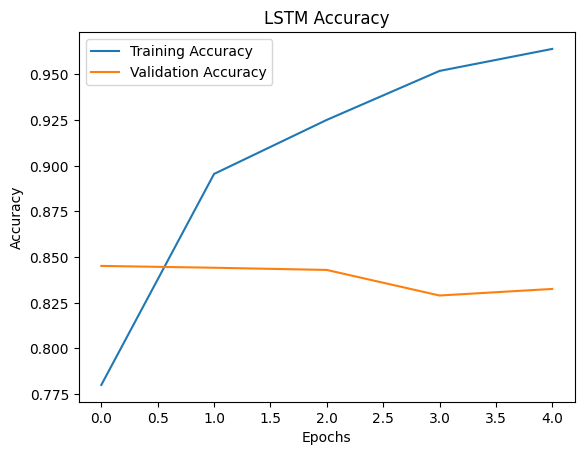

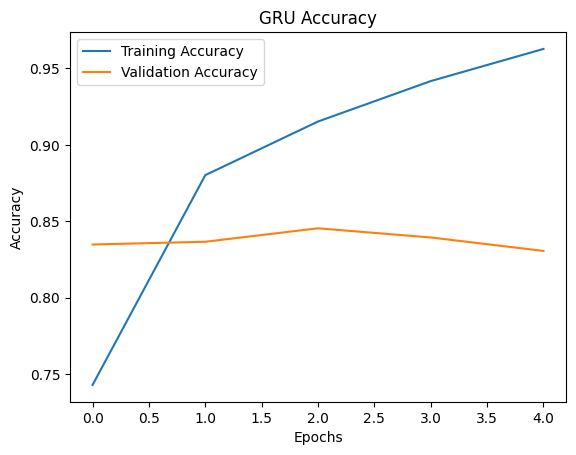

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Parameters
max_words = 10000  # Maximum number of words to consider as features
maxlen = 100       # Cut texts after this number of words (among top max_words most common words)

# Load data
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

# Pad sequences to ensure equal length
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Function to create an LSTM model
def create_lstm_model():
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=maxlen))
    model.add(LSTM(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Function to create a GRU model
def create_gru_model():
    model = Sequential()
    model.add(Embedding(max_words, 128, input_length=maxlen))
    model.add(GRU(128))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Train the LSTM model
lstm_model = create_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the LSTM model
lstm_loss, lstm_accuracy = lstm_model.evaluate(x_test, y_test, verbose=0)
print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')

# Train the GRU model
gru_model = create_gru_model()
gru_history = gru_model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the GRU model
gru_loss, gru_accuracy = gru_model.evaluate(x_test, y_test, verbose=0)
print(f'GRU Model Accuracy: {gru_accuracy:.4f}')

# Function to plot training history
def plot_history(history, model_name):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# Plot training history for both models
plot_history(lstm_history, 'LSTM')
plot_history(gru_history, 'GRU')
